In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#setting seaborn for data visualization
sns.set()
#sklearn for adv statistical methods
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("5.1 Categorical.csv")
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


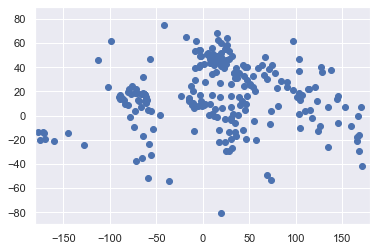

In [5]:
#plotting longitude on x-axis (-180 to 180) and latitude on y-axis (-90 to 90)
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [6]:
#pandas data slicing function (slicing the 0th and 3rd column, keeping 1st and 2nd column features)
x = data.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [15]:
#KMeans is the method from sklearn. the number in bracket indicates the number of clusters being used.
#the variable kmeans becomes the object
kmeans = KMeans(7)
#using the kmeans object with the 'fit' function implements the actual function of clustering
#we'll be clustering the sliced data (x) 
kmeans.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
#array of predicted cluster is created by the "fit_predict" method and is stored in the variable "identified_clusters"
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([4, 5, 3, 4, 6, 6, 6, 5, 4, 5, 2, 3, 1, 3, 4, 1, 6, 5, 3, 6, 0, 0,
       5, 6, 5, 4, 4, 6, 4, 6, 4, 4, 4, 4, 4, 1, 5, 3, 0, 6, 4, 5, 0, 0,
       3, 0, 2, 4, 3, 0, 4, 4, 4, 4, 6, 6, 6, 6, 3, 4, 6, 4, 0, 4, 6, 3,
       6, 6, 3, 6, 1, 4, 6, 6, 1, 0, 6, 5, 6, 0, 0, 0, 0, 0, 6, 4, 6, 4,
       1, 4, 1, 3, 4, 6, 4, 6, 1, 6, 5, 1, 3, 6, 5, 5, 6, 6, 6, 4, 6, 6,
       1, 5, 5, 3, 5, 1, 4, 4, 1, 6, 5, 1, 6, 0, 6, 4, 6, 5, 3, 6, 6, 6,
       1, 4, 0, 6, 6, 3, 5, 4, 1, 6, 0, 6, 5, 6, 5, 1, 3, 0, 4, 3, 3, 1,
       3, 1, 0, 1, 0, 4, 2, 6, 6, 5, 1, 1, 5, 5, 4, 2, 4, 1, 1, 1, 6, 4,
       1, 6, 4, 6, 2, 5, 6, 5, 3, 0, 5, 3, 3, 0, 1, 4, 0, 1, 0, 4, 6, 3,
       3, 4, 6, 0, 4, 6, 6, 6, 3, 4, 3, 6, 4, 0, 0, 1, 5, 5, 1, 2, 4, 6,
       6, 1, 3, 3, 6, 4, 4, 5, 6, 4, 4, 4, 4, 1, 1, 2, 2, 5, 3, 3, 3])

In [17]:
#forming a dataset including clustering
#first copy the data
data_with_clusters = data.copy()
# Create a new column and add the identified cluster array in the dataset
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,North America,4
1,Afghanistan,66.004734,33.835231,Asia,5
2,Angola,17.537368,-12.293361,Africa,3
3,Anguilla,-63.064989,18.223959,North America,4
4,Albania,20.049834,41.142450,Europe,6
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,2
237,Yemen,47.586762,15.909280,Asia,5
238,South Africa,25.083901,-29.000341,Africa,3
239,Zambia,27.774759,-13.458242,Africa,3


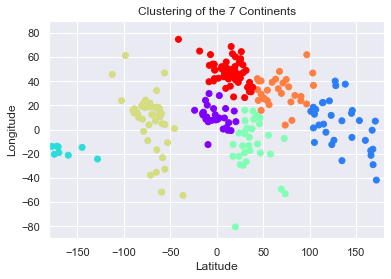

In [20]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
#c is an argument for color for different clusters
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Clustering of the 7 Continents")
plt.show()